In [113]:
import matplotlib.pyplot as plt
import re
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

In [136]:
input_data = {}
REGEX = re.compile("^(?P<time>.*) (?P<action>START|STOP) predict_per_district .*\(district_name='(?P<district>.*)', region_name=.*$")
with open("../json/parallel_computation.log") as file:
    for row in file:
        action_time, action, district = REGEX.findall(row)[0]
        converted_time = mdates.datestr2num(action_time)
        if action == "START":
            input_data[district] = converted_time
        else:
            input_data[district] = (input_data[district], converted_time)

In [137]:
data = {i: input_data[i] for i in list(input_data.keys())[:5]} 
for i in list(input_data.keys())[-5:]:
    data[i] = input_data[i]

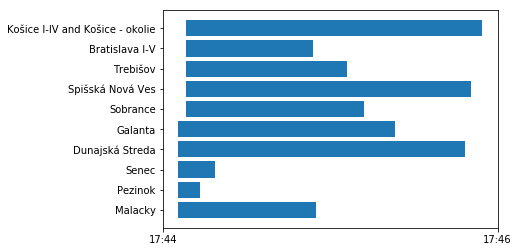

In [145]:
cats = {key: number for number, key in enumerate(data.keys())}

verts = []
for key, values in data.items():
    v =  [(values[0], cats[key]-.4),
          (values[0], cats[key]+.4),
          (values[1], cats[key]+.4),
          (values[1], cats[key]-.4),
          (values[0], cats[key]-.4)]
    verts.append(v)

bars = PolyCollection(verts)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.add_collection(bars)
ax.autoscale()
loc = mdates.MinuteLocator(byminute=[0,5,10,15,20,25,30,35,40])
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax.set_yticks(range(len(data)))
ax.set_yticklabels(data.keys())
plt.show()
fig.savefig(f"pdf/parallel_times.pdf", 
            dpi=600,
            format="pdf", 
            facecolor="none", 
            alpha=0, 
            edgecolor="none", 
            bbox_inches="tight",
            orientation="portrait")